##Face Mask Detection using CNN

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:01<00:00, 93.9MB/s]
100% 163M/163M [00:01<00:00, 88.9MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Dependent Variable

In [7]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)
labels = with_mask_labels + without_mask_labels

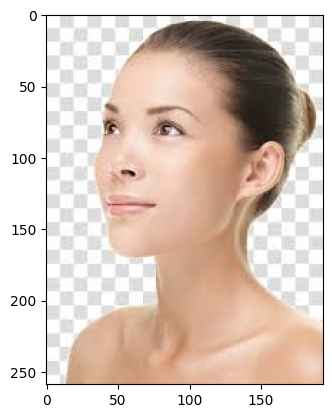

In [8]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [9]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
data[0].shape

(128, 128, 3)

In [11]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [12]:
type(X)
type(Y)

numpy.ndarray

Splitting the Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [15]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Model Traning

In [26]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=15)

Epoch 1/15
152/152 [==============================] - 4s 23ms/step - loss: 0.0517 - acc: 0.9830 - val_loss: 0.3581 - val_acc: 0.9256
Epoch 2/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0575 - acc: 0.9810 - val_loss: 0.3798 - val_acc: 0.9090
Epoch 3/15
152/152 [==============================] - 3s 19ms/step - loss: 0.0409 - acc: 0.9851 - val_loss: 0.3696 - val_acc: 0.9206
Epoch 4/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0364 - acc: 0.9868 - val_loss: 0.3960 - val_acc: 0.9256
Epoch 5/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0475 - acc: 0.9843 - val_loss: 0.3694 - val_acc: 0.9189
Epoch 6/15
152/152 [==============================] - 3s 17ms/step - loss: 0.0913 - acc: 0.9681 - val_loss: 0.3378 - val_acc: 0.9140
Epoch 7/15
152/152 [==============================] - 3s 20ms/step - loss: 0.0509 - acc: 0.9787 - val_loss: 0.3682 - val_acc: 0.9289
Epoch 8/15
152/152 [==============================] - 3s 18ms/step - 

In [27]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 9ms/step - loss: 0.3811 - acc: 0.9265
Test Accuracy = 0.9265387058258057


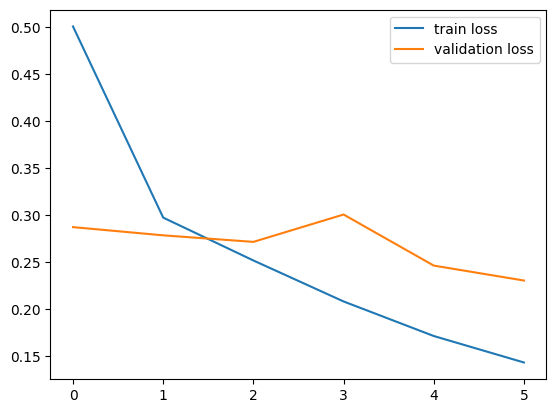

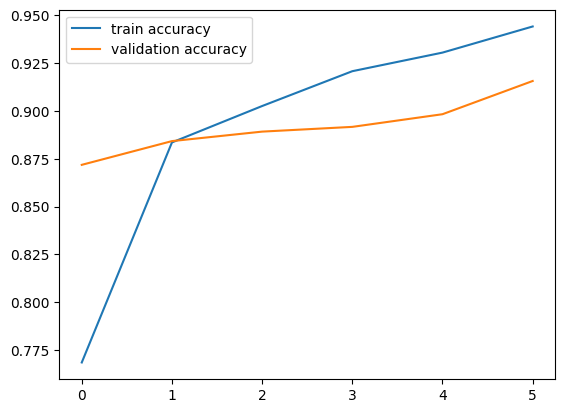

In [21]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

##For Random Image

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


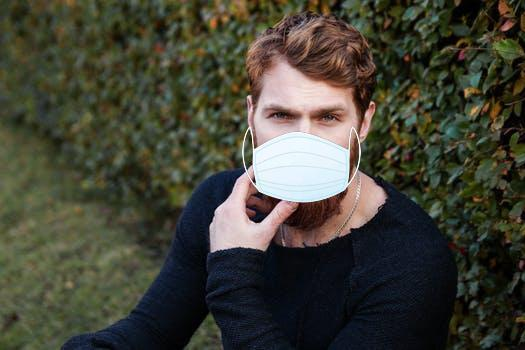

1/1 [==============================] - 0s 206ms/step
[[0.39904484 0.6268157 ]]
1
The person in the image is wearing a mask


In [23]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')